In [2]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/JABBAR/Downloads/Daily Household Transactions.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the data
print(df.head())


                  Date                   Mode        Category  \
0  20/09/2018 12:04:08                   Cash  Transportation   
1  20/09/2018 12:03:15                   Cash            Food   
2           19/09/2018  Saving Bank account 1    subscription   
3  17/09/2018 23:41:17  Saving Bank account 1    subscription   
4  16/09/2018 17:15:08                   Cash       Festivals   

               Subcategory                         Note  Amount  \
0                    Train         2 Place 5 to Place 0    30.0   
1                   snacks  Idli medu Vada mix 2 plates    60.0   
2                  Netflix         1 month subscription   199.0   
3  Mobile Service Provider            Data booster pack    19.0   
4             Ganesh Pujan                  Ganesh idol   251.0   

  Income/Expense Currency  
0        Expense      INR  
1        Expense      INR  
2        Expense      INR  
3        Expense      INR  
4        Expense      INR  


In [3]:
# Check for missing values
print(df.isnull().sum())


Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64


In [4]:
# Option to drop rows with missing values
df.dropna(inplace=True)

# Alternatively, fill missing values
# df['Column_Name'].fillna(value, inplace=True)


In [5]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)


0


In [8]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Check for any conversion errors
print(df['Date'].isnull().sum(), "rows could not be converted to datetime.")

# Now extract month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


631 rows could not be converted to datetime.


In [9]:
# Normalize category names
df['Category'] = df['Category'].str.lower().str.strip()


In [10]:
# Group by month to calculate total monthly expenses
monthly_expenses = df.groupby(['Month', 'Year'])['Amount'].sum().reset_index()

# Display monthly expenses
print(monthly_expenses)


    Month    Year     Amount
0     1.0  2016.0     368.00
1     1.0  2017.0    4800.00
2     1.0  2018.0  101417.90
3     2.0  2015.0    1036.00
4     2.0  2016.0    1349.00
5     2.0  2017.0   22207.00
6     2.0  2018.0    6826.00
7     3.0  2015.0    5333.00
8     3.0  2016.0     455.00
9     3.0  2017.0   13437.00
10    3.0  2018.0    6567.75
11    4.0  2015.0    2052.00
12    4.0  2016.0     777.00
13    4.0  2017.0    4560.68
14    4.0  2018.0    5898.00
15    5.0  2015.0    9019.00
16    5.0  2016.0   12180.00
17    5.0  2017.0    4650.00
18    5.0  2018.0   25200.00
19    6.0  2016.0    6190.00
20    6.0  2017.0    1586.50
21    6.0  2018.0   26253.02
22    7.0  2016.0    2609.00
23    7.0  2017.0   37091.00
24    7.0  2018.0   10504.36
25    8.0  2015.0    3499.00
26    8.0  2016.0    1599.00
27    8.0  2017.0   16198.00
28    8.0  2018.0    8180.65
29    9.0  2015.0     420.00
30    9.0  2016.0    1447.00
31    9.0  2017.0    7975.00
32    9.0  2018.0     696.00
33   10.0  201

In [11]:
# Calculate average transaction amount
avg_transaction = df['Amount'].mean()
print(f"Average Transaction Amount: {avg_transaction}")


Average Transaction Amount: 474.37052463211774


In [12]:
# Display summary statistics
print(df.describe(include='all'))


                                 Date  Mode Category Subcategory        Note  \
count                             932  1563     1563        1563        1563   
unique                            NaN     4       16          87         857   
top                               NaN  Cash     food        Milk  milk 1lit    
freq                              NaN   752      746         156          66   
mean    2017-07-29 13:31:58.456008704   NaN      NaN         NaN         NaN   
min               2015-02-19 20:51:37   NaN      NaN         NaN         NaN   
25%     2017-03-15 03:48:10.750000128   NaN      NaN         NaN         NaN   
50%        2017-08-31 10:22:14.500000   NaN      NaN         NaN         NaN   
75%        2018-02-27 02:27:02.500000   NaN      NaN         NaN         NaN   
max               2018-09-20 12:04:08   NaN      NaN         NaN         NaN   
std                               NaN   NaN      NaN         NaN         NaN   

              Amount Income/Expense Cur

In [13]:
# Check for missing values
print(df.isnull().sum())


Date              631
Mode                0
Category            0
Subcategory         0
Note                0
Amount              0
Income/Expense      0
Currency            0
Month             631
Year              631
dtype: int64


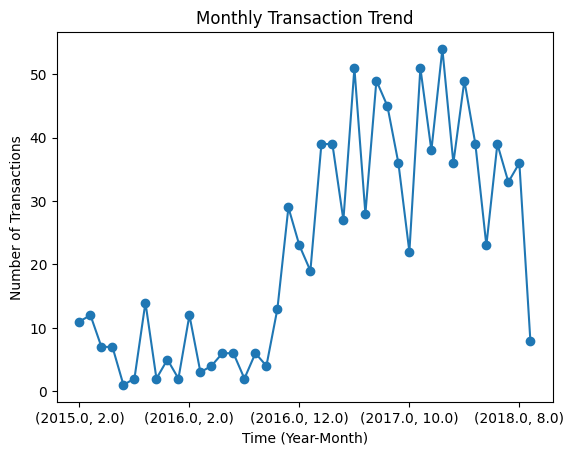

In [14]:
import matplotlib.pyplot as plt

# Group by month and count transactions
monthly_transactions = df.groupby(['Year', 'Month']).size()

# Plot
monthly_transactions.plot(kind='line', marker='o')
plt.title("Monthly Transaction Trend")
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Transactions")
plt.show()


In [15]:
# Group by 'Category' and calculate total amount spent
category_totals = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Print the category totals
print(category_totals)


Category
transportation    165738.78
household         153863.58
investment         85858.00
food               77115.30
subscription       72225.49
health             64416.75
tourism            63608.85
apparel            25125.82
family             16939.20
festivals           6911.00
culture             4264.36
beauty              4039.00
education            537.00
grooming             400.00
social life          298.00
documents            100.00
Name: Amount, dtype: float64


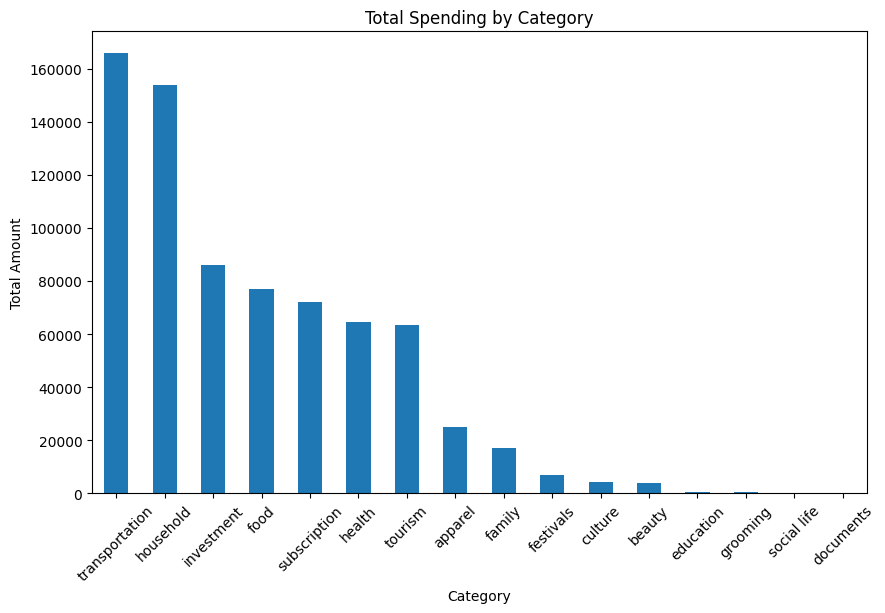

In [16]:
# Plot the total spending per category
category_totals.plot(kind='bar', figsize=(10, 6))
plt.title("Total Spending by Category")
plt.xlabel("Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()


In [17]:
# Group data by Month and calculate total monthly spending
monthly_expenses = df.groupby('Month')['Amount'].sum()

# Print the monthly expenses
print(monthly_expenses)


Month
1.0     106585.90
2.0      31418.00
3.0      25792.75
4.0      13287.68
5.0      51049.00
6.0      34029.52
7.0      50204.36
8.0      29476.65
9.0      10538.00
10.0     15107.69
11.0     62741.00
12.0     46521.60
Name: Amount, dtype: float64


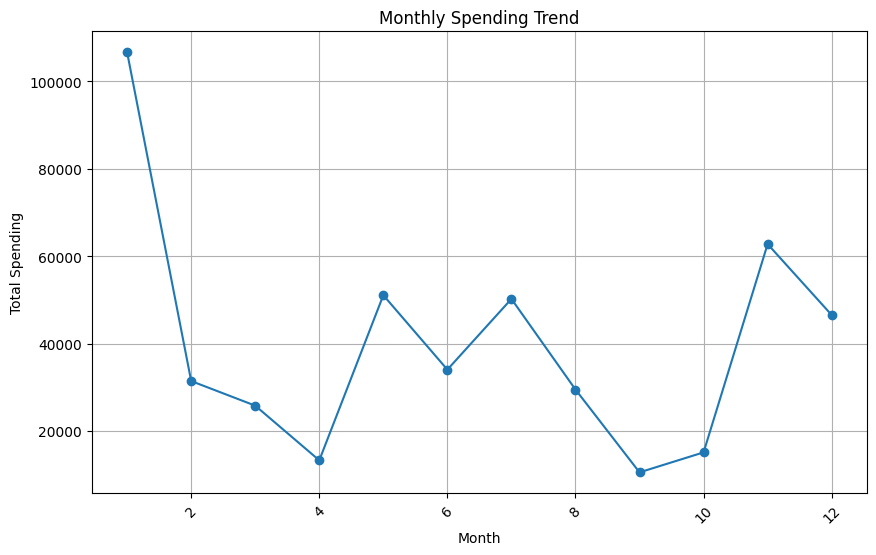

In [18]:
# Plot monthly spending trend
monthly_expenses.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Monthly Spending Trend")
plt.xlabel("Month")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [19]:
# Group data by Date and calculate total daily spending
daily_expenses = df.groupby('Date')['Amount'].sum()

# Print daily expenses
print(daily_expenses)


Date
2015-02-19 20:51:37     34.0
2015-02-19 20:52:01     45.0
2015-02-23 15:43:13    526.0
2015-02-23 18:39:59     20.0
2015-02-23 19:37:47     20.0
                       ...  
2018-09-15 06:34:17    200.0
2018-09-16 17:15:08    251.0
2018-09-17 23:41:17     19.0
2018-09-20 12:03:15     60.0
2018-09-20 12:04:08     30.0
Name: Amount, Length: 864, dtype: float64


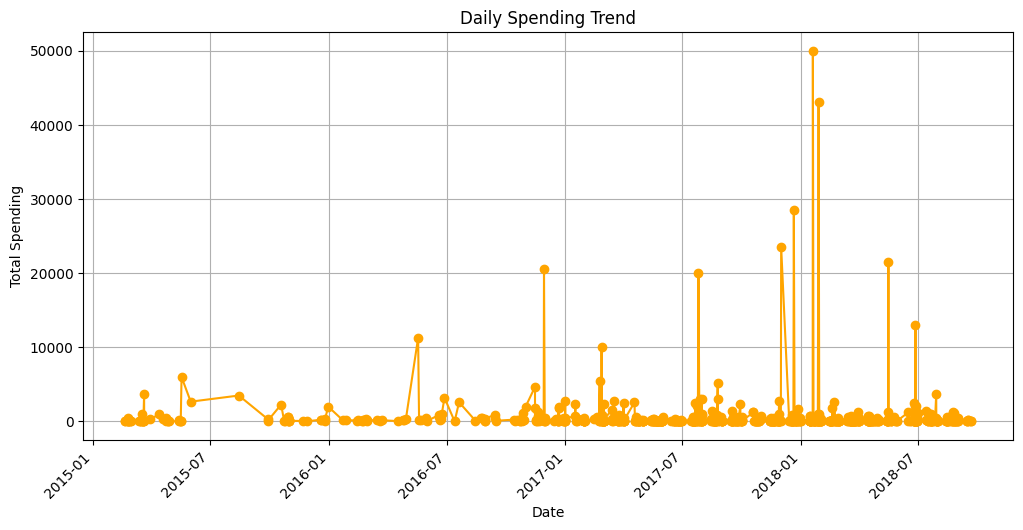

In [20]:
# Plot daily spending trend
daily_expenses.plot(kind='line', marker='o', figsize=(12, 6), color='orange')
plt.title("Daily Spending Trend")
plt.xlabel("Date")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [21]:
# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = daily_expenses.quantile(0.25)
Q3 = daily_expenses.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for anomalies
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: -285.75, Upper Bound: 556.25


In [22]:
# Filter out anomalies (outliers)
anomalies = daily_expenses[(daily_expenses < lower_bound) | (daily_expenses > upper_bound)]

# Print anomalies
print("Anomalies Detected:")
print(anomalies)


Anomalies Detected:
Date
2015-03-16 21:30:08    1000.0
2015-03-20 19:08:18    3700.0
2015-04-13 12:24:47    1000.0
2015-05-17 17:57:12    6000.0
2015-05-31 21:44:54    2671.0
                        ...  
2018-08-13 18:33:36     594.0
2018-08-23 21:29:12    1205.4
2018-08-23 21:29:52    1305.4
2018-08-24 13:34:14    1000.0
2018-08-24 22:13:43    1120.0
Name: Amount, Length: 102, dtype: float64


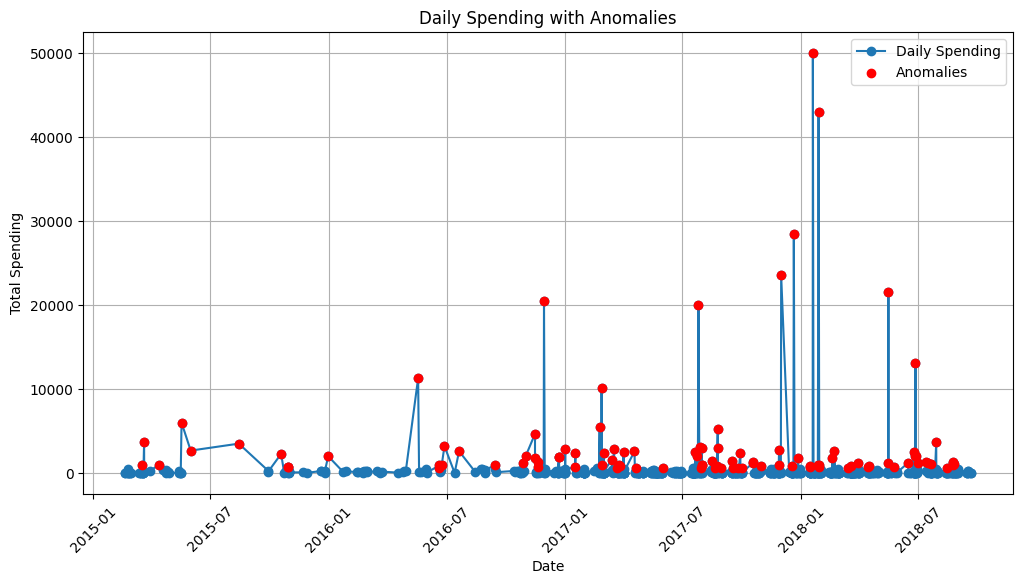

In [23]:
# Plot the daily spending trend with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(daily_expenses.index, daily_expenses, marker='o', label="Daily Spending")
plt.scatter(anomalies.index, anomalies, color='red', label="Anomalies", zorder=5)
plt.title("Daily Spending with Anomalies")
plt.xlabel("Date")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Group by 'Month' and calculate total spending per month
monthly_expenses = df.groupby('Month')['Amount'].sum()

# Print monthly expenses
print("Monthly Expenses:")
print(monthly_expenses)


Monthly Expenses:
Month
1.0     106585.90
2.0      31418.00
3.0      25792.75
4.0      13287.68
5.0      51049.00
6.0      34029.52
7.0      50204.36
8.0      29476.65
9.0      10538.00
10.0     15107.69
11.0     62741.00
12.0     46521.60
Name: Amount, dtype: float64


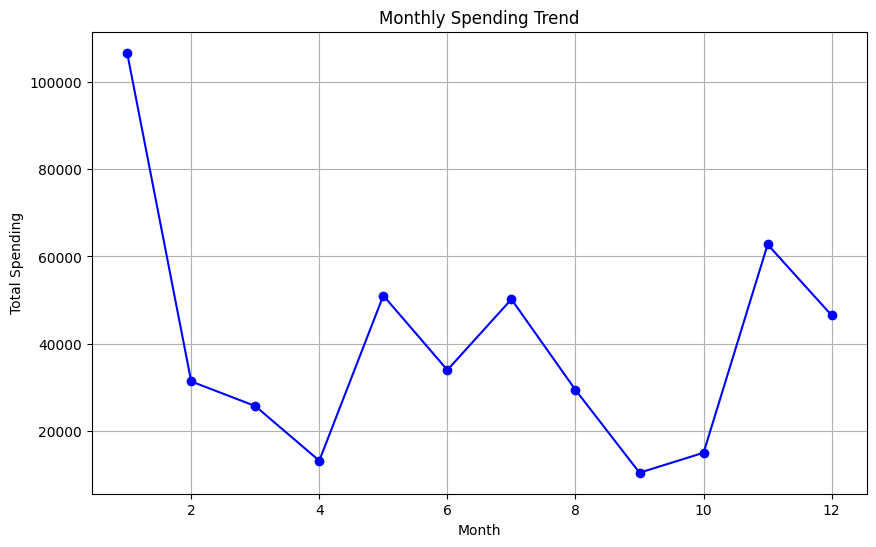

In [25]:
# Plot monthly spending trend
plt.figure(figsize=(10, 6))
monthly_expenses.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Spending Trend")
plt.xlabel("Month")
plt.ylabel("Total Spending")
plt.grid(True)
plt.show()


In [26]:
# Group by 'Category' and calculate total spending for each category
category_expenses = df.groupby('Category')['Amount'].sum()

# Print category-wise expenses
print("Spending by Category:")
print(category_expenses)


Spending by Category:
Category
apparel            25125.82
beauty              4039.00
culture             4264.36
documents            100.00
education            537.00
family             16939.20
festivals           6911.00
food               77115.30
grooming             400.00
health             64416.75
household         153863.58
investment         85858.00
social life          298.00
subscription       72225.49
tourism            63608.85
transportation    165738.78
Name: Amount, dtype: float64


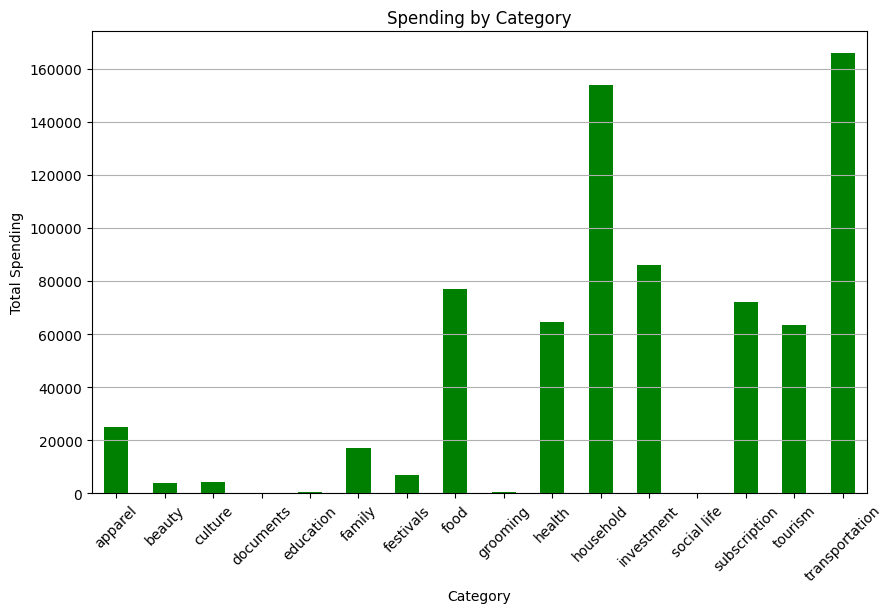

In [27]:
# Plot category-wise spending
plt.figure(figsize=(10, 6))
category_expenses.plot(kind='bar', color='green')
plt.title("Spending by Category")
plt.xlabel("Category")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [28]:
# Set a threshold for identifying high-value transactions
threshold = 1000  # You can adjust this value based on your data
anomalies = df[df['Amount'] > threshold]

# Display anomalies
print("Anomalous Transactions:")
print(anomalies)


Anomalous Transactions:
                    Date                   Mode        Category Subcategory  \
48   2018-08-24 22:13:43            Credit Card            food      Dinner   
53   2018-08-23 21:29:52            Credit Card  transportation       train   
54   2018-08-23 21:29:12            Credit Card  transportation       train   
87                   NaT            Credit Card          health      Health   
88                   NaT            Credit Card         apparel    Clothing   
...                  ...                    ...             ...         ...   
2199 2015-05-31 21:44:54  Saving Bank account 1       household  Appliances   
2202 2015-05-17 17:57:12  Saving Bank account 1  transportation        Taxi   
2264 2015-03-20 19:08:18            Credit Card          health    Hospital   
2279                 NaT            Credit Card          health    Hospital   
2304                 NaT                   Cash          health    Hospital   

                           

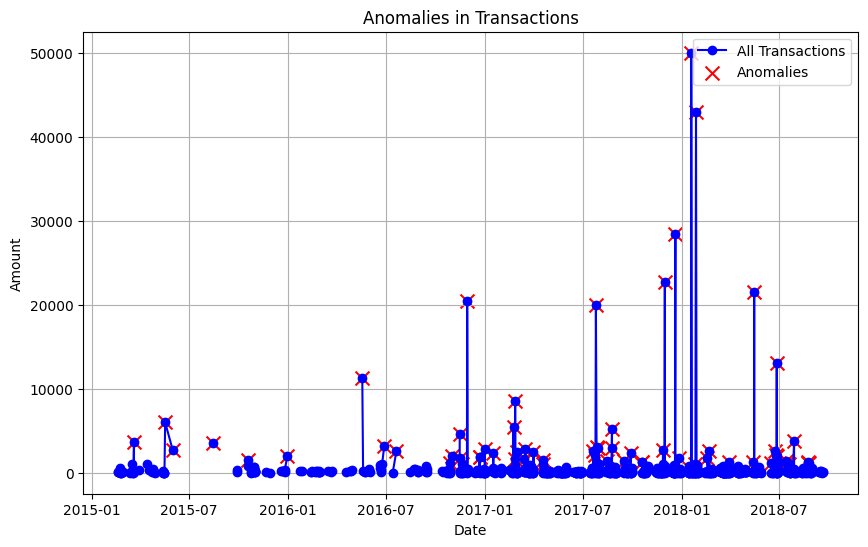

In [30]:
# Plot all transactions with anomalies highlighted
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Amount'], label='All Transactions', marker='o', linestyle='-', color='blue')
plt.scatter(anomalies['Date'], anomalies['Amount'], color='red', label='Anomalies', marker='x', s=100)
plt.title("Anomalies in Transactions")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.grid()
plt.show()


In [31]:
# Summary statistics
summary_stats = df.describe()

# Print key metrics
print("Summary of Key Metrics:")
print(summary_stats)


Summary of Key Metrics:
                                Date        Amount       Month         Year
count                            932   1563.000000  932.000000   932.000000
mean   2017-07-29 13:31:58.456008704    474.370525    6.101931  2017.091202
min              2015-02-19 20:51:37      2.000000    1.000000  2015.000000
25%    2017-03-15 03:48:10.750000128     30.000000    3.000000  2017.000000
50%       2017-08-31 10:22:14.500000     69.000000    6.000000  2017.000000
75%       2018-02-27 02:27:02.500000    240.000000    9.000000  2018.000000
max              2018-09-20 12:04:08  50000.000000   12.000000  2018.000000
std                              NaN   2508.265923    3.414022     0.844040


In [32]:
print("Summary of Transactions Analysis")
print("Total transactions:", len(df))
print("Total spending:", df['Amount'].sum())
print("Average transaction:", df['Amount'].mean())
print("Number of anomalies detected:", len(anomalies))


Summary of Transactions Analysis
Total transactions: 1563
Total spending: 741441.13
Average transaction: 474.37052463211774
Number of anomalies detected: 99
